

## 🔍 What is MCMC?

**Markov Chain Monte Carlo (MCMC)** is a method for **sampling from complex probability distributions** — especially **posterior distributions** in Bayesian inference.

### 🧠 Why use it in Machine Learning?

In **Bayesian Machine Learning**, we often want to estimate the **posterior distribution** of model parameters:
\[
P(\theta | D) = \frac{P(D|\theta) P(\theta)}{P(D)}
\]
But computing this directly is hard because \( P(D) \) (the **evidence**) is a high-dimensional integral.

👉 **MCMC helps** us draw samples from this posterior distribution without computing the evidence.

---

## 🏗️ Core Ideas of MCMC

### 1. **Markov Chain**
- A process where the **next state depends only on the current state**, not the full history.

### 2. **Monte Carlo**
- A method that uses **random sampling** to compute numerical results (like integrals).

### 3. **MCMC Algorithm (e.g., Metropolis-Hastings)**
- Start with an initial guess \( \theta_0 \)
- Propose a new sample \( \theta^* \) from a proposal distribution (e.g., normal)
- Compute acceptance probability:
  \[
  A = \min\left(1, \frac{P(\theta^*|D)}{P(\theta_t|D)}\right)
  \]
- Accept or reject \( \theta^* \)
- Repeat for many iterations to form a **Markov chain** that samples from the desired posterior.

---

## 🔁 Intuition

Imagine trying to explore a complex landscape (probability distribution). MCMC is like a **drunken walker** that explores the land — sometimes accepting steps uphill, sometimes staying put, but eventually spending **more time in higher probability regions**.

---

## 💻 Simple Python Code (Metropolis-Hastings for 1D Gaussian)

Let’s say we want to sample from a 1D normal distribution \( \mathcal{N}(0, 1) \):

```python
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Normal with mean=0, std=1
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# MCMC Metropolis-Hastings
def metropolis_hastings(n_samples, proposal_std):
    samples = []
    x_current = 0  # start at 0

    for _ in range(n_samples):
        x_proposed = np.random.normal(x_current, proposal_std)
        acceptance_ratio = target_distribution(x_proposed) / target_distribution(x_current)
        
        if np.random.rand() < acceptance_ratio:
            x_current = x_proposed  # Accept
        samples.append(x_current)
        
    return np.array(samples)

# Run the sampler
samples = metropolis_hastings(10000, proposal_std=1.0)

# Plotting
x = np.linspace(-4, 4, 1000)
plt.hist(samples, bins=50, density=True, alpha=0.6, label='MCMC Samples')
plt.plot(x, target_distribution(x), 'r-', label='True Distribution')
plt.title('MCMC Sampling of Normal Distribution')
plt.legend()
plt.show()
```

---

## 🧪 Applications in ML

- **Bayesian Logistic Regression**
- **Gaussian Processes**
- **Neural Networks (Bayesian NNs)**
- **Latent Dirichlet Allocation (LDA)** in NLP

---

## 🔚 TL;DR

| Concept | Intuition |
|--------|-----------|
| **Markov Chain** | Memoryless walk |
| **Monte Carlo** | Random sampling |
| **MCMC** | Sample from complex posteriors |
| **Use case** | Bayesian inference in ML |

---



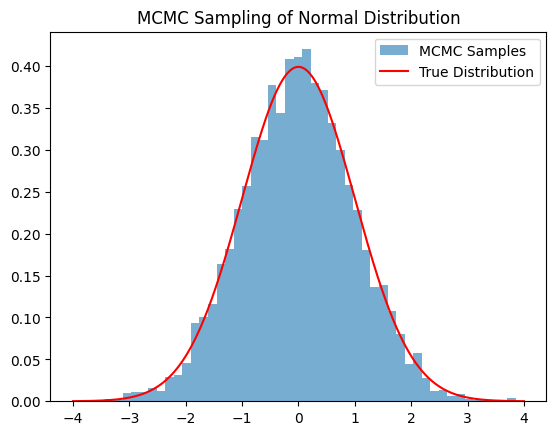

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Normal with mean=0, std=1
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# MCMC Metropolis-Hastings
def metropolis_hastings(n_samples, proposal_std):
    samples = []
    x_current = 0  # start at 0

    for _ in range(n_samples):
        x_proposed = np.random.normal(x_current, proposal_std)
        acceptance_ratio = target_distribution(x_proposed) / target_distribution(x_current)

        if np.random.rand() < acceptance_ratio:
            x_current = x_proposed  # Accept
        samples.append(x_current)

    return np.array(samples)

# Run the sampler
samples = metropolis_hastings(10000, proposal_std=1.0)

# Plotting
x = np.linspace(-4, 4, 1000)
plt.hist(samples, bins=50, density=True, alpha=0.6, label='MCMC Samples')
plt.plot(x, target_distribution(x), 'r-', label='True Distribution')
plt.title('MCMC Sampling of Normal Distribution')
plt.legend()
plt.show()



---

# 🧠 PART 1: What is MCMC?

## 🎯 THE GOAL:
To **draw samples** from **complicated probability distributions** when direct sampling is **not possible**.

---

### 🧩 WHY DO WE NEED IT?

Imagine you have a complex distribution like this:

```
             _____
           /       \
 _____    /         \     _____
      \__/           \___/
```

This isn’t a nice Normal or Uniform distribution. How do we sample from it?

✅ We can’t write a direct formula  
✅ We can’t use `np.random.normal`  
✅ But we **can simulate** it with **Markov Chain Monte Carlo (MCMC)**

---

## 🛠️ CORE CONCEPTS

| Concept | Meaning |
|--------|--------|
| **Monte Carlo** | Using **random sampling** to solve problems (like estimating π, area under curve, etc.) |
| **Markov Chain** | A sequence where the **next state depends only on the current one**, not the history |
| **MCMC** | We build a **Markov chain** to generate samples from a target distribution using **random sampling** |

---

# 🏗️ PART 2: Build Intuition (Step by Step)

### 👟 Step 1: Understand Sampling

Let’s say you have a function `f(x)` you **can evaluate**, but you **can’t sample from**.

Your goal: Generate points `x1, x2, ..., xn` such that they "look like" they came from `f(x)`.

---

### 🔁 Step 2: Think Like a Drunk Walker (Markov Chain)

Start at a random point → Propose a new point → Decide whether to **accept or reject** based on how likely the new point is.

📍 If it's better → Accept  
📍 If it's worse → Maybe accept (with some probability)  
📍 This keeps you exploring and not getting stuck

Over time, the samples will reflect the shape of `f(x)` — that's MCMC!

---

# ⚙️ PART 3: Code MCMC from Scratch

Let’s do this for a **1D Gaussian (Normal)**:

```python
import numpy as np
import matplotlib.pyplot as plt

# Target: Standard Normal Distribution (mean=0, std=1)
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Metropolis-Hastings algorithm
def metropolis_hastings(n_samples=10000, proposal_std=1.0):
    samples = []
    current_x = 0  # Start at zero

    for _ in range(n_samples):
        proposed_x = np.random.normal(current_x, proposal_std)  # Step
        accept_ratio = target_distribution(proposed_x) / target_distribution(current_x)

        # Accept with probability min(1, accept_ratio)
        if np.random.rand() < accept_ratio:
            current_x = proposed_x
        
        samples.append(current_x)

    return np.array(samples)

samples = metropolis_hastings()

# Plot
x = np.linspace(-4, 4, 1000)
plt.hist(samples, bins=50, density=True, alpha=0.5, label="MCMC Samples")
plt.plot(x, target_distribution(x), 'r-', label="True Normal Distribution")
plt.legend()
plt.title("MCMC Samples vs True Distribution")
plt.show()
```

✅ This works without ever using `np.random.normal(mean, std)` to generate from the actual normal distribution  
✅ The algorithm **learned** the shape of the curve just by evaluating it

---

# 🔍 PART 4: Real MCMC Use in Machine Learning

### ✅ Use Case 1: **Bayesian Inference**

In Bayesian stats, we want to compute:
\[
P(\theta | D) = \frac{P(D|\theta) P(\theta)}{P(D)}
\]
MCMC helps us **sample from this posterior** distribution of parameters \( \theta \).

No need to solve that scary denominator.

---

### ✅ Use Case 2: **Bayesian Logistic Regression**

Normally we find weights `w` that minimize a loss function.  
But in Bayesian world, we want:
\[
P(w|X, y) \propto P(y|X, w) P(w)
\]

MCMC helps **generate many samples of `w`** — allowing us to:

- Get uncertainty estimates
- Visualize possible weight configurations
- Make more robust predictions

---

# 🚀 PART 5: Advanced MCMC Concepts

## 🌀 1. Gibbs Sampling

Instead of proposing whole vector at once, sample **each variable one at a time** conditioned on others.

✅ Very efficient for **high-dimensional** models  
✅ Used in **Latent Dirichlet Allocation (LDA)**

---

## 💥 2. Hamiltonian Monte Carlo (HMC)

Imagine using **physics** (momentum, force) to guide sampling.

✅ Faster exploration of parameter space  
✅ Used in tools like **PyMC3** and **Stan**

---

## 📦 BONUS: Real MCMC Libraries in Python

- 🔁 `PyMC3` or `PyMC` – Full Bayesian modeling with MCMC
- 🔮 `emcee` – Lightweight MCMC sampler (good for science/stats)
- ⚙️ `TensorFlow Probability` – Deep MCMC + Probabilistic Programming

---

# 🧠 Final Summary

| Term | Meaning |
|------|---------|
| MCMC | Sampling tool when you can't sample directly |
| Markov Chain | Memoryless process |
| Metropolis-Hastings | Accept/reject based on probability |
| Bayesian ML | MCMC = tool to get parameter uncertainty |
| Advanced | Gibbs, HMC = more efficient variants |

---



<ipython-input-3-a81063bc7878>:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(x, target_distribution(x)/np.trapz(target_distribution(x), x), label="True shape")


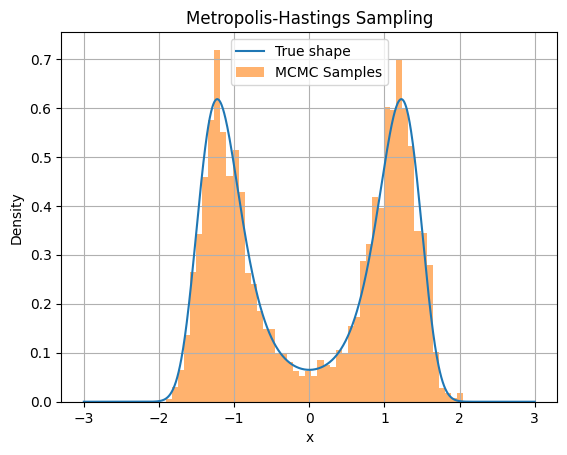

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Define the weird probability distribution (unnormalized)
def target_distribution(x):
    return np.exp(-x**4 + 3 * x**2)

# STEP 2: Metropolis-Hastings Sampling Function
def metropolis_hastings(n_samples=5000, proposal_std=1.0):
    samples = []
    x_current = 0.0  # Start from 0

    for i in range(n_samples):
        # STEP 2.1: Propose a new x from a Normal distribution around current x
        x_proposed = np.random.normal(x_current, proposal_std)

        # STEP 2.2: Compute acceptance ratio
        prob_current = target_distribution(x_current)
        prob_proposed = target_distribution(x_proposed)
        acceptance_ratio = prob_proposed / prob_current

        # STEP 2.3: Accept or reject the proposed x
        if np.random.rand() < acceptance_ratio:
            x_current = x_proposed  # accept

        samples.append(x_current)  # save current x (whether accepted or not)

    return np.array(samples)

# STEP 3: Run MCMC
samples = metropolis_hastings()

# STEP 4: Plot the histogram and compare with actual shape
x = np.linspace(-3, 3, 1000)
plt.plot(x, target_distribution(x)/np.trapz(target_distribution(x), x), label="True shape")
plt.hist(samples, bins=50, density=True, alpha=0.6, label="MCMC Samples")
plt.title("Metropolis-Hastings Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
